# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

Import the relevant modules

In [2]:
#Import data from file
data = np.loadtxt('data.csv', delimiter=',', skiprows=1)
X1 = data[:, np.newaxis, 0]
X2 = data[:, np.newaxis, 1]
X3 = data[:, np.newaxis, 2]
X4 = data[:, np.newaxis, 3]
X5 = data[:, np.newaxis, 4]
X = np.concatenate((X1, X2, X3, X4, X5), axis=1)
Y = data[:, 5]
#Alphas/Lamdba range for the Ridge/Lasso Regression
alphas = np.logspace(-6, 6, 13)

Imports and formats data to be used with Scikit-learn.

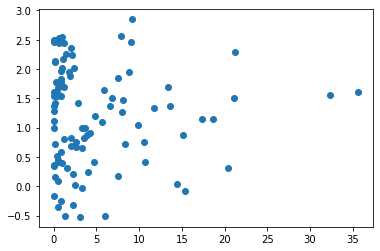

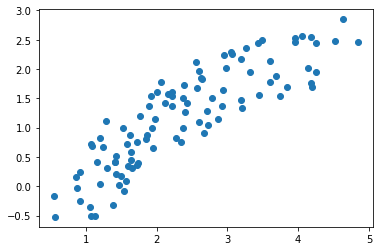

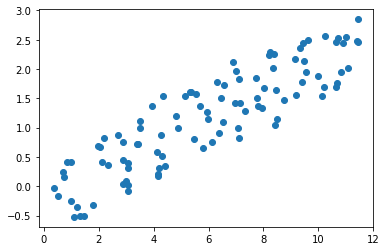

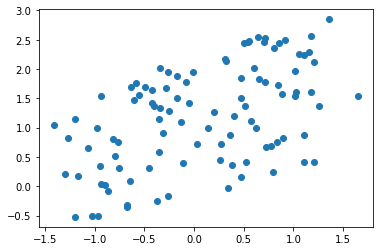

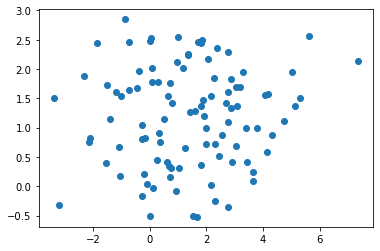

In [3]:
raw = np.array((X1, X2, X3, X4, X5))
for i in range(0, 5):
    plt.scatter(raw[i], Y)
    plt.show()

As this problem is one about linear regression and not categoristion, I will not be considering Logistic Regression. To ensure that basis functions would not be useful the code above produces some scatter graphs of the data. This data clearly shows either a clear linear pattern or no relevant pattern at all. Having non-linear combinations of the data would therefore not increase the accruacy of the solution.

In [4]:
models = LinearRegression, RidgeCV, LassoCV
model_names = 'linear regression', 'Ridge regression using CV', 'Lasso regression using CV'
highest_r2 = 0
highest_method = ''
modal_calc = [0, 0, 0]
r2_store = [0, 0, 0]
#test over a reasonable number of training set sizes
for i in range(30, 80):
    for j, model in enumerate(models):
        if model == LinearRegression:
            reg = model()
        else:
            reg = model(alphas=alphas, normalize=True)
        reg.fit(X[:i], Y[:i])
        r2 = reg.score(X[i:], Y[i:])
        r2_store[j] = r2
        #find highest overall r2
        if r2 > highest_r2:
            highest_r2 = r2
            highest_method = model_names[j]
            highest_test_number = i
    #increment the index of whichever method has the highest r2
    modal_calc[r2_store.index(max(r2_store))] += 1

print('Highest r2 is: ' + str(highest_r2) + ' with ' +
      highest_method + ' at ' + str(highest_test_number))
print(modal_calc)

Highest r2 is: 0.9931852185426807 with Lasso regression using CV at 46
[2, 15, 33]


This section of code was to see which type of regression has the most consitently high r2. It finds the method with the highest test value for each tesing set size (within a reasonable range of 30-80 training data). When a method 'wins' it's number is incremented in the modal_calc list. As you can see when the code is run it shows that Lasso regression (at index 2) is the winner, with 33 out of the 50 possible highest r2 values. The highest r2 value overall is also with Lasso regression at test size 46. We can now create the model to test the unseen data with. Without normalising, Linear Regression has the highest r2, but adding normalisation only increased the accuracy of the model, so I added normalisation. The training set was limited to a maximum of 80 to avoid overfitting, the final regression model used only 46 training data points so will not suffer from overfiting.

In [5]:
print('LASSO REGRESSION')
Lasso = LassoCV(alphas=alphas, normalize=True).fit(X[:46], Y[:46])
lasso_predicted = Lasso.predict(X[46:])
lasso_error = Lasso.score(X[46:], Y[46:])
lasso_complexity = Lasso.alpha_
lasso_mse = mean_squared_error(Y[46:], lasso_predicted)
print('r2 value is: ' + str(lasso_error))
print('Complexity value is: ' + str(lasso_complexity))
print('Mean Squared Error is: ' + str(lasso_mse))

LASSO REGRESSION
r2 value is: 0.9931852185426807
Complexity value is: 0.0001
Mean Squared Error is: 0.0020537828603568085


This code block runs the Lasso Regression, it returns all paramters along with the r2 value, complexity and mean squared error

In [6]:
unseen_data = np.loadtxt('unseendata.csv', delimiter=',', skiprows=1)
unseen_X1 = unseen_data[:, np.newaxis, 0]
unseen_X2 = unseen_data[:, np.newaxis, 1]
unseen_X3 = unseen_data[:, np.newaxis, 2]
unseen_X4 = unseen_data[:, np.newaxis, 3]
unseen_X5 = unseen_data[:, np.newaxis, 4]
unseen_X = np.concatenate((unseen_X1, unseen_X2, unseen_X3, unseen_X4, unseen_X5), axis=1)
unseen_Y = data[:, 5]
unseen_r2 = Lasso.score(unseen_X, unseen_Y)
print('Unseen r2 value is: ' + str(unseen_r2))

Unseen r2 value is: 0.9976984706029531


The tile above runs the unseen data and prints the r2 value.

# Question 2

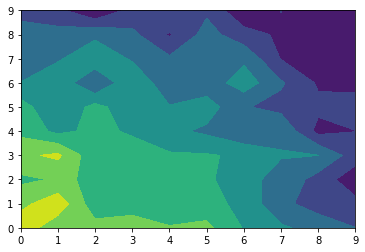

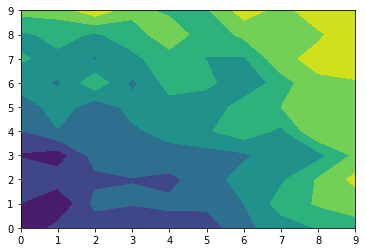

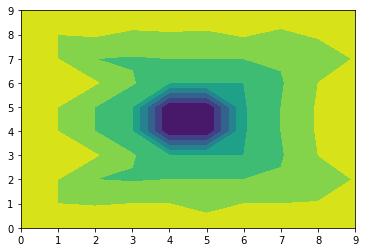

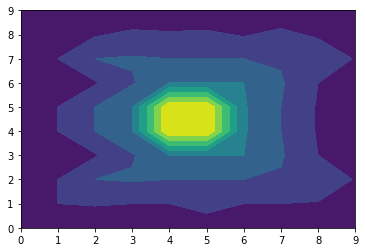

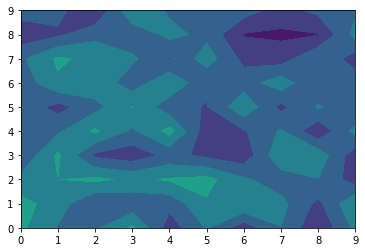

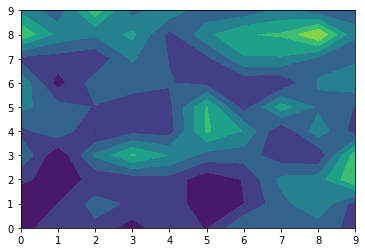

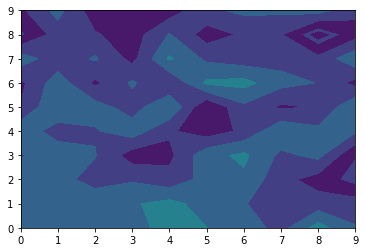

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.decomposition import PCA
import pandas as pd

#get data and format it to be plotted
data_1 = np.loadtxt('sqisland.csv', delimiter=',', skiprows=1)
datas = pd.read_csv('sqisland.csv')
q2_X = [0,1,2,3,4,5,6,7,8,9]
q2_Y = [0,1,2,3,4,5,6,7,8,9]
G1 = data_1[:, 2]
G2 = data_1[:, 3]
G3 = data_1[:, 4]
G4 = data_1[:, 5]
G5 = data_1[:, 6]
G6 = data_1[:, 7]
G7 = data_1[:, 8]
Genes = np.array([G1, G2, G3, G4, G5, G6, G7])

for i in range(2, 9):
    plt.contourf(q2_X, q2_Y, data_1[:,i].reshape(10,10))
    #for the final three plots force the levels to be the same to make it 
    #easier to see what is going on
    if i > 5:
        plt.contourf(q2_X, q2_Y, data_1[:, i].reshape(10,10), levels=[.1, .2, .3, .4, .5, .6, .7, .8, .9])
    plt.show()


LOCUS 1
(Farmers) - The Farmers arrived on the south west of the island. As the first graph shows, gene 1 is particularly prominent in this area, lowering in occurence roughly every one mile. This fits the description of the farmer population so the farmers' most comon allele in locus 1 is gene 1.
(Hunter Gatherers) - The hunter gatherers spread evenly across the island before the others arrived, this means that any trend observed in other gene pools will be inverted for them. This means that because teh farmers most common gene is gene 1, this must be the opposite for them. The hunters' most common allele at locus 1 is gene 2.

LOCUS 2
(Hunter Gatherers) - As the seafarers will dominate the costal regions of the island the hunter gatherers' most common allele will be in the center of the island. Looking at graph 4 we can see that this is the case. The hunter gatherers' most common allele at locus 2 is gene 4.
(Farmers) - There does not seem to be any clear common allele for the farmers for this locus. It could be the case that there is no dominant allele for the farmers at the locus.

(Seafarers) - As stated above the seafarers woud dominate the costline. Graph 3 clearly shows a high concentration of gene 3 around the costline. The seafarers' most common allele at locus 2 is gene 3. There does not seem to be any other clear indication that the seafarers have a more common allele at locus 1 or 3.

In [8]:
#Calculate Variance of each Gene
variances = []
for gene in Genes:
    variance = np.var(gene)
    variances.append(variance)
    print('Variance for G' + str(variances.index(variance) + 1) + ': ' + str(variance))

Variance for G1: 0.060582434371
Variance for G2: 0.06058243437099999
Variance for G3: 0.0010836736
Variance for G4: 0.0010836735999999985
Variance for G5: 0.009514104445105358
Variance for G6: 0.020771410865005658
Variance for G7: 0.009074831617783594


Above is the code to show the variances of each gene.

In [9]:
#Pearson correlation
#For gene 1 and gene 4
G14 = scipy.stats.pearsonr(G1, G4)
print('The p value between genes 1 and 4 is: '+ str(G14[1]))
#For gene 1 and gene 5
G15 = scipy.stats.pearsonr(G1, G5)
print('The p value between genes 1 and 5 is: '+ str(G15[1]))

The p value between genes 1 and 4 is: 0.4567315550997607
The p value between genes 1 and 5 is: 0.00023304482007153996


The null hypothesis can be rejected for the correlation between genes 1 and 5 as the p-value is <0.05, it is also below the extra threshold of 0.01 so the correlation can be considered 'very signficant'. This would mean that the farmers' most common allele at locus 3 would be gene 5.
The same cannot be said for genes 1 and 4. With a p value of ~0.45 we cannot discount the possibility of non-correlation. This means that the hypothesis stated above, that there is no most common allele for the farmers at locus 2, holds.

In [10]:
#apply PCA with standardisation across all 7 genes
pca = PCA(n_components=7)
standardised_Genes = (datas - datas.mean()) / datas.std()
new_Genes = pca.fit_transform(standardised_Genes)
sums = 0
for i, dim in enumerate(('first', 'second', 'third', 'fourth',
                         'fifth', 'sixth', 'seventh')):
    print('The {0} principal component has variance: '.format(dim) 
          + str(np.var(new_Genes[:,i])))
    sums += np.var(new_Genes[:,i])
print('New variances sum is: ' + str(sums))
print('Old variances sum is: ' + str(np.sum(variances)))

The first principal component has variance: 3.7289022988160974
The second principal component has variance: 2.017287433348568
The third principal component has variance: 1.2543968004280348
The fourth principal component has variance: 1.0254924491739374
The fifth principal component has variance: 0.7606761045737804
The sixth principal component has variance: 0.12324491365957585
The seventh principal component has variance: 4.841437543415457e-18
New variances sum is: 8.909999999999995
Old variances sum is: 0.16269256286989464


The variance here has clearly increased. This is to be expected as PCA seeks to maximise the variance of each principal component, subject to the condition that each principal is orthogonal to all prior components. In this case the maximum variance for each allele pair was already orthogonal to the other as they are directly inversly proportional. So each pair could have the maximum possible variance.

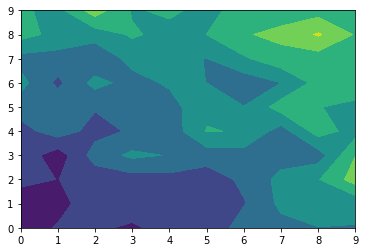

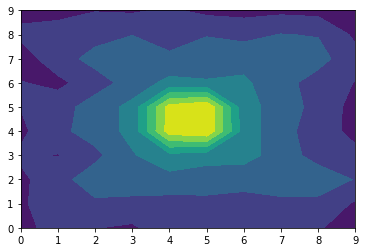

In [11]:
for i in range(0, 2):
    plt.contourf(q2_X, q2_Y, new_Genes[:, i].reshape(10,10))
    plt.show()

These two plots are for the first and second principal component respectively. For this set of data they do not particularly help as there are not too many underlying variables (in this case 3 locus'), so the waves are easy to reconstruct without PCA. Overall they do slightly help by condensing the data from the first 4 genes into the first two principal components, allowing the data analyser to more easily see the areas in which each gene is more prevelant for each locus. If many locuses where in the large data set PCA would help by reducing dimensionality down to each of these locuses. However, where each locus has more than two genes as its alleles, PCA in conjunction with a contour plot becomes less useful as it is harder to gain understanding from the countour plot if a locus is reduced to one graph.